# What is the notebook about?

## Problem - Grid Environment Algorithms
This problem deals with a Grid environment and stochastic actions. The tasks you have to do are:
- Implement Value Iteration
- Implement Policy Iteration
- Visualize the results
- Explain the results

## How to use this notebook? 📝

- This is a shared template and any edits you make here will not be saved.**You
should make a copy in your own drive**. Click the "File" menu (top-left), then "Save a Copy in Drive". You will be working in your copy however you like.

- **Update the config parameters**. You can define the common variables here

Variable | Description
--- | ---
`AICROWD_DATASET_PATH` | Path to the file containing test data. This should be an absolute path.
`AICROWD_RESULTS_DIR` | Path to write the output to.
`AICROWD_ASSETS_DIR` | In case your notebook needs additional files (like model weights, etc.,), you can add them to a directory and specify the path to the directory here (please specify relative path). The contents of this directory will be sent to AIcrowd for evaluation.
`AICROWD_API_KEY` | In order to submit your code to AIcrowd, you need to provide your account's API key. This key is available at https://www.aicrowd.com/participants/me

- **Installing packages**. Please use the [Install packages 🗃](#install-packages-) section to install the packages

# Setup AIcrowd Utilities 🛠

We use this to bundle the files for submission and create a submission on AIcrowd. Do not edit this block.

In [ ]:
!pip install -U aicrowd-cli > /dev/null 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# AIcrowd Runtime Configuration 🧷

Define configuration parameters.

In [ ]:
import os

AICROWD_DATASET_PATH = os.getenv("DATASET_PATH", os.getcwd()+"/bed4406c-df6f-4632-89b9-30e59e423e55_data_grid.zip")
AICROWD_RESULTS_DIR = os.getenv("OUTPUTS_DIR", "results")
API_KEY = "" # Get your key from https://www.aicrowd.com/participants/me (ctrl + click the link)

In [ ]:
!aicrowd login --api-key $API_KEY
!aicrowd dataset download -c rl-assignment-2-gridworld

API Key valid
Saved API Key successfully!
bed4406c-df6f-4632-89b9-30e59e423e55_data_grid.zip: 100% 104k/104k [00:00<00:00, 402kB/s]


In [ ]:
DATASET_DIR = 'data_grid/'
!unzip $AICROWD_DATASET_PATH


Archive:  /content/c989fb6b-8246-46df-87e0-49311b3d9f6d_data_grid.zip
   creating: data_grid/
   creating: data_grid/evaluator/
   creating: data_grid/targets/
   creating: data_grid/inputs/
  inflating: data_grid/evaluator/evaluate.py  
  inflating: data_grid/targets/targets_2.npy  
  inflating: __MACOSX/data_grid/targets/._targets_2.npy  
  inflating: data_grid/targets/targets_1.npy  
  inflating: __MACOSX/data_grid/targets/._targets_1.npy  
  inflating: data_grid/targets/target_times_2.npy  
  inflating: data_grid/targets/target_times_1.npy  
  inflating: data_grid/targets/targets_policy_2.npy  
  inflating: __MACOSX/data_grid/targets/._targets_policy_2.npy  
  inflating: data_grid/targets/targets_policy_1.npy  
  inflating: __MACOSX/data_grid/targets/._targets_policy_1.npy  
  inflating: data_grid/inputs/inputs_1.npy  
  inflating: data_grid/inputs/inputs_2.npy  


# Install packages 🗃

Please add all package installations in this section

# Import packages 💻

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import os
# ADD ANY IMPORTS YOU WANT HERE


# Prediction Phase

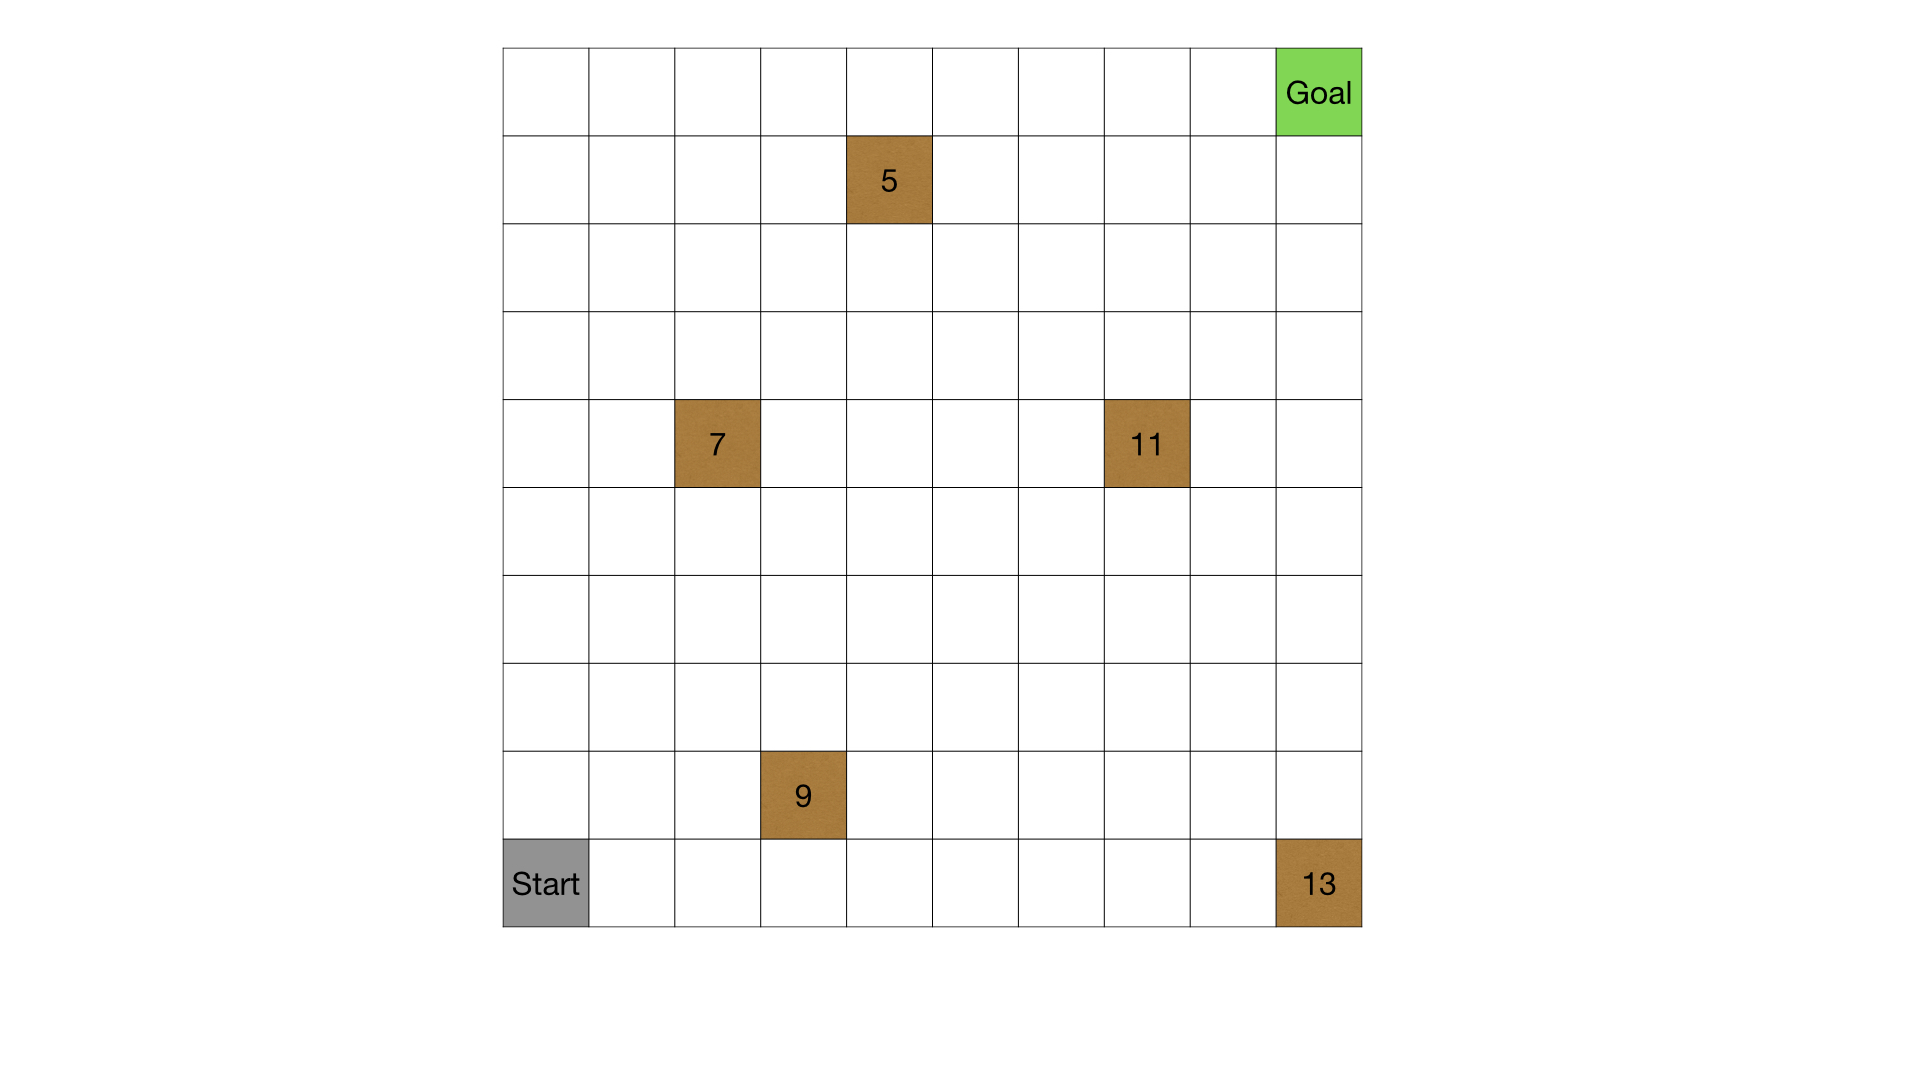

# State Space Formulation

The state space includes the status of the subgoal states as each subgoal state can be in either of the two states, i.e. visited or not-visited. Hence, we include a binary vector into the state space.

Let's say we have 5 subgoals as in the figure. Then our binary vector would be of length 5. For e.g. $[0, 0, 1, 0, 1]$ would imply that the third and fifth sub-goals have been already visited in the past.

e.g. $[(1, 7),[0, 1, 0, 1, 1]]$, this means that we are in location $(1,7)$ and a have already visited the subgoals 2, 4 and 5.

However, there can be alternative way to map this state space representation to something more compact. The binary vector of length $n$ can be represented as an integer in the range $[0, 2^n-1]$ with a one-to-one correspondence.

$$
\therefore \left[(1, 7),[0, 1, 0, 1, 1]\right] \mapsto (1, 7, 11) .
$$

Note that the corresponding subgoal in the binary vector is respective to its location in the ``subgoal_location`` list. For e.g. in the above grid, the subgoals with location(s) $$[(0, 9), (1, 3), (5, 2), (5, 7), (8, 4)],$$ and the corresponding binary vector $$[0, 1, 0, 1, 1],$$ would imply that the subgoals
$[(0, 9), (5, 2)]$ have not been visited while $[(1,3), (5, 7), (8, 4)]$ have been visited.

This compact mapping can be used as indices for our value grid. Fill the helper functions ``binv2num`` and ``num2binv`` to use in your code.

In [ ]:
def binv2num(arr):
    '''
    Converts a binary vector (list) of any length to an integer.
    e.g. [0,1,0,1,1] -> 11.
    '''
    sum_ = 0
    ## INSERT YOUR CODE BELOW THIS LINE


    return int(sum_)

def num2binv(num, n=5):
    '''
    Converts an integer to a binary vector (list) of length n.
    e.g. 11 -> [0,1,0,1,1]
    '''
    binv = []
    ## INSERT YOUR CODE BELOW THIS LINE
    

    return binv

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class GridEnv_HW2:
    def __init__(self,
                 subgoal_location,
                 goal_location, 
                 action_stochasticity,
                 non_terminal_reward,
                 subgoal_reward,
                 terminal_reward,
                ):

        # Do not edit this section 
        self.action_stochasticity = action_stochasticity
        self.non_terminal_reward = non_terminal_reward
        self.subgoal_reward = subgoal_reward
        self.terminal_reward = terminal_reward
        self.grid_size = [10, 10]

        # Index of the actions 
        self.actions = {'N': (1, 0), 
                        'E': (0,1), 
                        'S': (-1,0), 
                        'W': (0,-1)}
        
        # Do not worry about the names not matching the direction you expect
        # Think of them as generic names and use the mapping to get the action direction and stochasticity
        self.perpendicular_order = ['N', 'E', 'S', 'W']
        
        l = ['normal' for _ in range(self.grid_size[0]) ]
        self.grid = np.array([l for _ in range(self.grid_size[1]) ], dtype=object)

        # We number the subgoals in order of their appearance in the list 'subgoal_locations'
        for i, sg in enumerate(subgoal_location):
            self.grid[sg[0],sg[1]] = 'subgoal'+str(i+1)
        
        
        self.grid[goal_location[0], goal_location[1]] = 'goal'
        self.goal_location = goal_location
        
        self.subgoal_location = subgoal_location

        self.states_sanity_check()
    
    def states_sanity_check(self):
        """ Implement to prevent cases where the goal gets overwritten etc """
        pass

    def visualize_grid(self):
        pass

    def _out_of_grid(self, loc):
        # state = [(loc[0], loc[1]), [0, 0, ..., 0]]
        
        if loc[0] < 0 or loc[1] < 0:
            return True
        elif loc[0] > self.grid_size[0] - 1:
            return True
        elif loc[1] > self.grid_size[1] - 1:
            return True
        else:
            return False

    def _grid_state(self, loc):
        return self.grid[loc[0], loc[1]]        
        
    def get_transition_probabilites_and_reward(self, state, action):
        """ 
        Returns the probabiltity of all possible transitions for the given action in the form:
        A list of tuples of (next_state, probability, reward)
        Note that based on number of state and action there can be many different next states
        Unless the state is All the probabilities of next states should add up to 1
        """
        loc, binv = state[0], state[1]
        grid_state = self._grid_state(loc)
        
        if grid_state == 'goal':
            return [(state, 1.0, 0.0)]
        
        direction = self.actions.get(action, None)
        if direction is None:
            raise ValueError("Invalid action %s , please select among" % action, list(self.actions.keys()))

        nextstates_prob_rews = []

        # TASK 0 - Complete the environment

        # ADD YOUR CODE BELOW - DO NOT EDIT ABOVE THIS LINE

        # Hints: 
            # Get access to all actions with self.actions
            # Use self.action_stochasticity for the probabilities of the other action
                # The array will have probabilities for [0, 90, 180, -90] degrees
                # So self.action_stochasticity = [0.8, 0.1, 0.0, 0.1] means 0.8 for forward and 0.1 for left and right
            # Remember that you need to return a list of tuples with the form (next_state, probability, reward)
            # If you have 3 possible next states, you should return [(ns1, p1, r1), (ns2, p2, r2), (ns3, p3, r3)]
            # Use the helper function self._out_of_grid to check if any state is outside the grid
            
        # Important Note:
            # Do not hard code any state locations, they may be changed in the submissions
        


        # DO NOT EDIT BELOW THIS LINE
        return nextstates_prob_rews

    def step(self, state, action):
        npr = self.get_transition_probabilites_and_reward(state, action)
        probs = [t[1] for t in npr]
        sampled_idx = np.random.choice(range(len(npr)), p=probs)
        sampled_npr = npr[sampled_idx]
        next_state = sampled_npr[0]
        reward = sampled_npr[2]
        is_terminal = next_state[0] == tuple(self.goal_location)
        return next_state, reward, is_terminal

In [ ]:
# Default Gridworld Data

def get_base_kwargs():
    subgoal_location = [(0, 9), (1, 3), (5, 2), (5, 7), (8, 4)]
    goal_location = (9,9)
    action_stochasticity = [1.0, 0.0, 0.0, 0.0]
    non_terminal_reward = -1
    subgoal_reward = [13, 9, 7, 11, 5]
    terminal_reward = 100

    base_kwargs =  {
            "subgoal_location": subgoal_location,
            "goal_location": goal_location,
            "action_stochasticity": action_stochasticity,
            "non_terminal_reward": non_terminal_reward,
            "subgoal_reward": subgoal_reward,
            "terminal_reward": terminal_reward,}
    
    return base_kwargs

base_kwargs = get_base_kwargs()

In [ ]:
# The Gridworld looks like this as an np.array()

env = GridEnv_HW2(**base_kwargs)
print(np.flipud(env.grid))

[['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
  'normal' 'goal']
 ['normal' 'normal' 'normal' 'normal' 'subgoal5' 'normal' 'normal'
  'normal' 'normal' 'normal']
 ['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
  'normal' 'normal']
 ['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
  'normal' 'normal']
 ['normal' 'normal' 'subgoal3' 'normal' 'normal' 'normal' 'normal'
  'subgoal4' 'normal' 'normal']
 ['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
  'normal' 'normal']
 ['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
  'normal' 'normal']
 ['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
  'normal' 'normal']
 ['normal' 'normal' 'normal' 'subgoal2' 'normal' 'normal' 'normal'
  'normal' 'normal' 'normal']
 ['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
  'normal' 'subgoal1']]


# Algorithm

Implement your algorithms here

## 2.1 Value Iteration

Implement your custom value iteration algorithm below

In [ ]:
def value_iteration(env, gamma=0.99):
    '''
    Code your value iteration algorithms here, the function should return a np 
    array of dimensions (10, 10, 2^(no. of sub-goals)). Also return the final
    policy grid corresponding to the final values.
    '''
    
    # extracting no. of subgoals
    n = len(env.subgoal_reward)
    n2 = 2**n

    # Initial Values
    values = np.zeros((10, 10, n2))

    # Initial policy
    policy = np.empty((10, 10, n2), object)
    policy[:] = 'N' # Make all the policy values as 'N'


    # Begin code here

    
    # Put your extra information needed for plots etc in this dictionary
    extra_info = {
    }

    # End code

    # Do not change the number of output values
    return {"Values": values, "Policy": policy}, extra_info

## 2.2 Policy Iteration : 
Implement a standard policy iteration algorithm below

In [ ]:
def policy_iteration(env, gamma=0.99):
    '''
    Code a policy iteration algorithms here, the function should return a np 
    array of dimensions (10, 10, 2^(no. of sub-goals)) as the value gird and
    the final policy grid corresponding to the final values.
    '''

    # extracting no. of subgoals
    n = len(env.subgoal_reward)
    n2 = 2**n

    # Initial Values
    values = np.zeros((10, 10, n2))

    # Initial policy
    policy = np.empty((10, 10, n2), object)
    policy[:] = 'N' # Make all the policy values as 'N'


    #### Begin your code below this line




    # Put your extra information needed for plots etc in this dictionary
    extra_info = {
    }

    # End code

    # Do not change the number of output values
    return {"Values": values, "Policy": policy}, extra_info

## Evaluation

Here we evaluate and time the algorithm.

In [ ]:
import sys
import os
import numpy as np
sys.path.append(os.path.join(DATASET_DIR,"evaluator"))
from evaluate import generate_results
from evaluate import *


In [ ]:
if not os.path.exists(AICROWD_RESULTS_DIR):
  os.mkdir(AICROWD_RESULTS_DIR)
if not os.path.exists(DATASET_DIR+'/inputs'):
  os.mkdir(DATASET_DIR+'/inputs')

In [ ]:
# Do not edit this cell, generate results with it as is
input_dir = os.path.join(DATASET_DIR, f'inputs/')
if not os.path.exists(AICROWD_RESULTS_DIR):
    os.mkdir(AICROWD_RESULTS_DIR)
for params_file in os.listdir(input_dir):
    kwargs = np.load(os.path.join(input_dir, params_file), allow_pickle=True).item()
    idx = params_file.split('_')[-1][:-4]
    grid_env =  GridEnv_HW2(**kwargs)
    result_value, result_policy, running_time = generate_results(grid_env, value_iteration, policy_iteration, idx, AICROWD_RESULTS_DIR)


In [ ]:
# Check your score on the given test cases (There are more private test cases not provided)
result_folder = AICROWD_RESULTS_DIR
target_folder = os.path.join(DATASET_DIR, f'targets/')

def check_algo_match(results, targets, tol):
    values_match = np.allclose(results[0]['Values'], targets['Values'], atol=tol)
    policy_match = (results[0]['Policy'] == targets['Policy']).all()
    return values_match, policy_match

def check_score_value_iter(target_folder, result_folder):
    match = []
    for out_file in os.listdir(result_folder):
        if "results_value" in out_file:
          res_file = os.path.join(result_folder, out_file)
        else:
          continue
        if "base" in out_file:
          continue

        idx = res_file.split('_')[-1][:-4]
        time_file = os.path.join(result_folder, f"time_{idx}.npy")
        results = np.load(res_file, allow_pickle=True)
        time_taken = np.load(time_file, allow_pickle=True).item()
        target_file = os.path.join(target_folder, f"targets_{idx}.npy")
        target_times = np.load(os.path.join(target_folder, f"target_times_{idx}.npy"),allow_pickle=True).item()
        targets = np.load(target_file, allow_pickle=True).item()
        if time_taken > target_times["high"]:
          match.append(0)
          match.append(0)
        else:
          algo_results = results
          algo_targets = targets
          algo_match, policy_match = check_algo_match(algo_results, algo_targets, 1e-3)
          if time_taken > target_times["low"]:
            time_penalty = (time_taken - target_times["high"])/  (target_times["low"] - target_times["high"])
          else:
            time_penalty = 1
          match.append(time_penalty*algo_match)
          match.append(time_penalty*policy_match)
    return np.mean(match)


def check_score_policy_iter(target_folder, result_folder):
    policy_iter_match = []
    for out_file in os.listdir(result_folder):
        if "results_policy" in out_file:
          res_file = os.path.join(result_folder, out_file)
        else:
          continue
        if "base" in out_file:
          continue
        idx = res_file.split('_')[-1][:-4]
        target_file = os.path.join(target_folder, f"targets_policy_{idx}.npy")
        results = np.load(res_file, allow_pickle=True)
        targets = np.load(target_file, allow_pickle=True).item()
        algo_match, policy_match = check_algo_match(results, targets, 0.1)
        policy_iter_match.append(algo_match)
        policy_iter_match.append(policy_match)
    return np.mean(policy_iter_match)

if os.path.exists(target_folder):
    print(f"Shared data Score (normalized to 1): Value Iteration - {check_score_value_iter(target_folder, result_folder)}, Policy Iteration - {check_score_policy_iter(target_folder, result_folder)}")

Shared data Score (normalized to 1): Value Iteration - 0.0, Policy Iteration - 0.0


# Plots

## 2.3 Optimal Path :

Complete the optimal_path function. Your final output should look like this.
```python
Optimal Path:
[[' ' ' ' ' ' ' ' ' ' ' ' ' ' 'E' 'E' 'E']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' 'N' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' 'N' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' 'N' ' ' ' ']
 [' ' ' ' 'E' 'WE' 'E' 'E' 'E' 'N' ' ' ' ']
 [' ' ' ' ' ' 'N' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'N' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'N' ' ' ' ' ' ' ' ' ' ' ' ']
 ['E' 'E' 'E' 'N' ' ' ' ' ' ' ' ' ' ' ' ']
 ['N' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']]

Path Reward: 
111
```

**For the optimal path matrix**; each cell has a string of the actions ``N, S, E, W``. An empty string at a cell denotes a cell that has not been visited. A string with more than 1 characters is read in the following manner,

e.g. ``'WEN'`` implies that we go west ``W`` when we visit the cell first time, then go east ``E`` at the second visit, and then north ``N`` at the third, and so on.

**For the path reward**; print out the cumulative undiscounted reward that the agent would achieve when traversing the optimal path.

In [ ]:
def optimal_path(env, policy, start_state = [(0,0),[0]*5]):
    '''
    Code the optimal path function below, and return the optimal path matrix and
    as shown in the above example for a given policy.

    Hint: Use the env.step method to sample the rewards and states.
    '''
    
    grid = np.empty((10, 10), object)
    grid[:] = ' '
    state = start_state
    path_reward = 0

    # INSERT YOUR CODE BELOW THIS LINE.


    # DO NOT EDIT BELOW THIS LINE
    print("Optimal Path:")
    print(np.flipud(grid)) # flipud for accurate orientation
    print("Path Reward:")
    print(path_reward)

Run policy iteration for different integer values of the transition reward ranging from −1 to −5. Show the variations in the optimal path starting from the ”Start” state.


In [ ]:
def get_kwargs(non_terminal_reward):
    subgoal_location = [(0, 9), (1, 3), (5, 2), (5, 7), (8, 4)]
    goal_location = (9,9)
    action_stochasticity = [1.0, 0.0, 0.0, 0.0]
    non_terminal_reward = non_terminal_reward
    subgoal_reward = [13, 9, 7, 11, 5]
    terminal_reward = 100

    kwargs =  {
            "subgoal_location": subgoal_location,
            "goal_location": goal_location,
            "action_stochasticity": action_stochasticity,
            "non_terminal_reward": non_terminal_reward,
            "subgoal_reward": subgoal_reward,
            "terminal_reward": terminal_reward,}
    
    return kwargs

for non_terminal_reward in [-1, -5, -10]:
    kwargs = get_kwargs(non_terminal_reward)
    env = GridEnv_HW2(**kwargs)
    results = value_iteration(env, 0.999) # you can also use policy iteration function here
    print("===================================")
    print("Non-terminal reward: ",non_terminal_reward)
    ### NOTE: Uncomment the following line, only after you have finished implementing class GridEnv_HW2
    # optimal_path(env, results[0]["Policy"])

Non-terminal reward:  -1
Non-terminal reward:  -5
Non-terminal reward:  -10


## Answer the following questions

(2.a) Briefly comment on your custom value iteration algorithm **2.1** and the necessary improvements made from standard value iteration algorithms. Generate plots if required.


(2.b) How are the different values of the transition reward affecting the optimal path from **2.3**? Explain your findings in reference to the above plots.

*Answer here*

(2.a)

(2.b)

# Submit to AIcrowd 🚀

In [ ]:
!DATASET_PATH=$AICROWD_DATASET_PATH \
aicrowd notebook submit \
    -c rl-assignment-2-gridworld -a assets --no-verify
